# Logistic Regression - Keras

This tutorial is similar to the previous one ([Logistic Regression - NumPy Implementation](logistic_regression_numpy.ipynb)), but instead of implementing a Logistic Regression classifier from scratch, we will use the keras API, which is a powerful framework that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce to the Keras API and show you how simple it is to develop machine learning applications with it.
      
## Importing Python Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Model
from keras.layers import Dense, Activation,Input 
from keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

/home/roberto/Documents/virtualenv/venv03/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loding and Displaying 2D Dataset

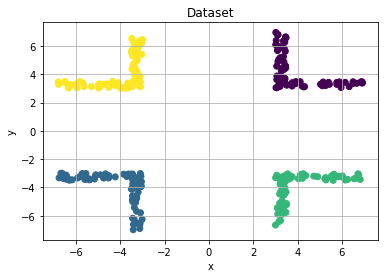

In [2]:
#Generating a synthetic dataset with four classes
nsamples = 300

data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
#data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
X = data[:,:-1] # Features
Y = data[:,-1].astype(int) # Labels

# Make the linear dataset non-linear
#Y[Y==2] = 1
#Y[Y==3] = 2


#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Dataset")
plt.show()

## Data Normalization

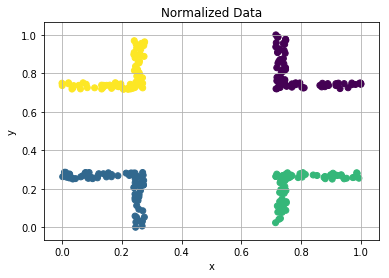

In [3]:
# min-max data normalization
X = (X-X.min(axis = 0,keepdims = True))/(X.max(axis = 0,keepdims = True)-X.min(axis = 0,keepdims = True))

#Displaying the normalized dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Normalized Data")
plt.show()

## Representing Labels using one-hot-ecoding

In [4]:
Y_oh = np_utils.to_categorical(Y, k) 

# Displaying the 5 first elemnts
print('Y[:5]:')
print(Y[:5])
print('\nY_oh[:5]=')
print(Y_oh[:5])

Y[:5]:
[0 0 0 0 0]

Y_oh[:5]=
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


## Defining the Logistic Regression Classifier with Keras

In [5]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    out1 = Dense(k, activation='softmax', kernel_initializer="zero")(inputs)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy') 
    return model

## Training the Model

In [6]:
model = my_model(k)
batch_size = nsamples
nb_epoch = 10000
n = X.shape[0] # number of training examples
history = model.fit(X, Y_oh, batch_size=batch_size, epochs=nb_epoch,verbose=0)

## Prininting Loss and estimated weights (Ws)

Final loss: 0.027132289327094043
Bias:
[-6.65145087  7.55974003 -0.31177584 -0.59651332]
W:
[[ 7.12997508 -7.41865971  9.24481358 -8.95612896]
 [ 7.19946395 -7.56727977 -8.99810514  9.36592097]]


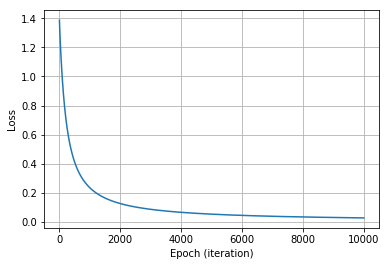

In [7]:
loss = model.evaluate(X, Y_oh, verbose=0)
print 'Final loss:',loss

W = model.get_weights()
print 'Bias:\n', W[1]
print 'W:\n', W[0]

plt.plot(history.history['loss'])
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Training Accuracy

In [8]:
Y_hat = model.predict(X).argmax(axis = 1)
accuracy = np.sum(Y_hat == Y)/np.float(n)
print
print 'Accuracy: ', accuracy


Accuracy:  1.0


## Logistic Regression Decision Boundary

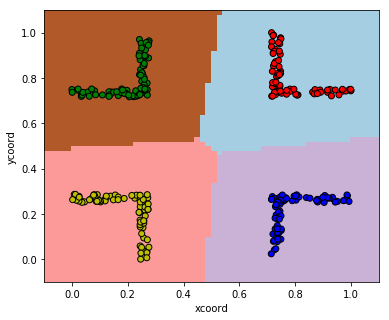

In [9]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X.min(axis=0) - slack, X.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X[:,0], X[:,1], c=colors[Y], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('xcoord')
plt.ylabel('ycoord')
plt.show()